# Introduction to mapclassify

`mapclassify` implementsbins = [ ybar + trim * ystd for trim in range(-2, 2+1) ] a family of classification schemes for choropleth maps. 
Its focus is on the determination of the number of classes, and the assignment of observations to those classes.
It is intended for use with upstream mapping and geovisualization packages (see [geopandas](https://geopandas.org/mapping.html) and [geoplot](https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html) for examples) that handle the rendering of the maps.

In this notebook, the basic functionality of mapclassify is presented.

In [1]:
import mapclassify as mc

mc.__version__

'2.4.2+55.g0155c6e6.dirty'

In [2]:
import geopandas as gpd

In [3]:
gdf = gpd.read_file("data/nyc/nyc.shp")

<AxesSubplot: >

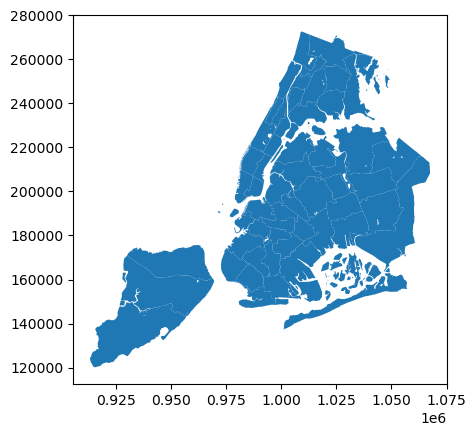

In [4]:
gdf.plot()

<AxesSubplot: >

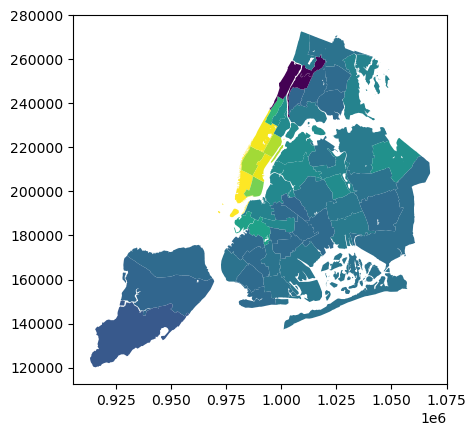

In [5]:
gdf.plot(column='rent2008')

In [6]:
std = mc.StdMean(gdf.rent2008)
std

StdMean                   

     Interval        Count
--------------------------
[   0.00,   68.04] |     3
(  68.04,  662.61] |     0
( 662.61, 1851.75] |    45
(1851.75, 2446.32] |     2
(2446.32, 2900.00] |     5

In [8]:
stda = mc.StdMean(gdf.rent2008, anchor=True)
stda

StdMean                   

     Interval        Count
--------------------------
[   0.00,   68.04] |     3
(  68.04,  662.61] |     0
( 662.61, 1257.18] |    33
(1257.18, 1851.75] |    12
(1851.75, 2446.32] |     2
(2446.32, 2900.00] |     5

In [7]:
y = gdf.rent2008
y.mean()

1257.1818181818182

In [9]:
y1 = y.values
y1[0] = 5000

In [10]:
mc.StdMean(y1)

StdMean                   

     Interval        Count
--------------------------
(   -inf, -227.42] |     0
(-227.42,  551.24] |     3
( 551.24, 2108.58] |    45
(2108.58, 2887.24] |     5
(2887.24, 5000.00] |     2

In [11]:
mc.StdMean(y1, anchor=True)

StdMean                   

     Interval        Count
--------------------------
[   0.00,  551.24] |     3
( 551.24, 1329.91] |    35
(1329.91, 2108.58] |    10
(2108.58, 2887.24] |     5
(2887.24, 3665.91] |     1
(3665.91, 4444.57] |     0
(4444.57, 5000.00] |     1

In [12]:
y1.mean()

1329.909090909091

In [17]:
z.min()

-2.1144409159637743

In [18]:
y.mean() - 2 * y.std()

68.04306411189191

In [19]:
(2446.321 - y.mean()) / y.std()

2.0000007194253047

In [20]:
min(z), max(z)

(-2.1144409159637743, 2.7630386718042783)

In [21]:
y.mean()

1257.1818181818182

In [23]:
list(map(int, (min(z), max(z))))

[-2, 2]

In [24]:
ybar = y.mean()
ystd = y.std()

In [25]:
bins = [ ybar + trim * ystd for trim in range(-2, 2+1) ]

In [26]:
bins

[68.04306411189191,
 662.6124411468551,
 1257.1818181818182,
 1851.7511952167815,
 2446.3205722517446]

In [27]:
int(-2.1)

-2

In [28]:
int(2.1)

2